In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df = df.dropna()

In [4]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [5]:
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [6]:
Y.isnull().sum()

0

## Train Test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
dtree = DecisionTreeRegressor(criterion="mse")

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [11]:
print(dtree.score(X_train,y_train))

1.0


In [12]:
print(dtree.score(X_test,y_test))

0.647070745940059


In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
score = cross_val_score(dtree,X,Y,cv=5)

In [15]:
score.mean()

0.41273788636023434

## Model Evaluation

In [16]:
prediction = dtree.predict(X_test)

D:\SD\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

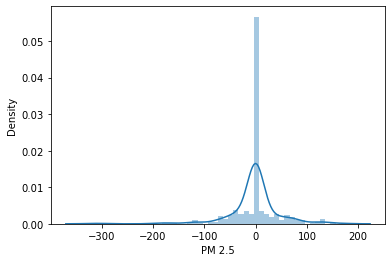

In [17]:
sns.distplot(y_test-prediction)

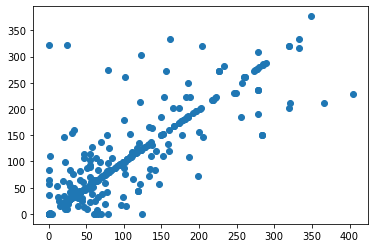

In [18]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning Decision Tree Regressor

In [19]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [22]:
random_search.fit(X,Y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [23]:
random_search.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [24]:
random_search.best_score_

-3131.6489619178874

In [25]:
predictions=random_search.predict(X_test)

D:\SD\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

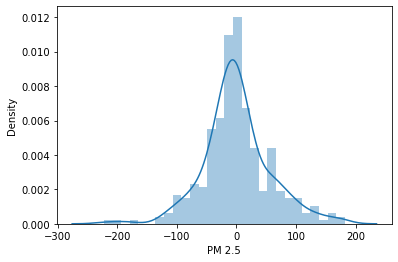

In [26]:
sns.distplot(y_test-predictions)

## Regression Evaluation Metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

<IPython.core.display.Javascript object>

MAE: 40.14163092473942


<IPython.core.display.Javascript object>

MSE: 3171.808145980198


<IPython.core.display.Javascript object>

RMSE: 56.31880810155874


In [28]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)

<IPython.core.display.Javascript object>